## Quantum key destribution and Quantum Cryptography

### This is for simulation only on qasm Simulator

#### Code by Akash and Daniel 

Brief description of the code.
If you want to send a code over the internet but dont want anyone to hear youto r conversation, QKD is the solution.
Basically, QKD is about making the right information available to public keeping the important points private.
Here we deal with **Alice** who wants to send a very secret message to **Bob**  

Required packages

In [1]:
import qiskit

#other useful packages
import math
import numpy as np

# Import Qiskit
from qiskit import Aer, execute
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

Set backend as the qasm Simulator

In [2]:
#define backend from the simulator
backend = Aer.get_backend('qasm_simulator')  

## Part 1: Define the message 

Enter a message that you would like to transmit to Bob. The default message is 'Hello world'. The cell below takes the input message and defines the 'length of message' (slightly longer than the actual message). This will be useful to generate our key. The longer this len_message, the better. (Keep it 3x to be on the safe side)

In [3]:
#you are ALICE
#this block deals with the breaking of message into small chucnks, need small chunks if you have small number of qubits

#message = '' #used for debugging
message = input('Enter a short message (default message is "Hello World") : ')
if len(message)<1:
    message = 'Hello World'
print('The message to be sent is "', message,'"')


#initial size of encrypttion key, arbitary number to multiply so that len of string/key is longer than the actual message!
len_message = len(message)*3

Enter a short message (default message is "Hello World") : 
The message to be sent is " Hello World "


Define the number of qubits of the system that will be used to process. Sice we need to generate a random string of binary numbers, we need to restrict it with the maximum available qubits. We then divide the message into chunks of maximum available qubits (default 5 qubits)

In [4]:
#define number of qbits
num_qbits=1

#break message into small chunchs with len <=5 (using 5 qubit systems)
break_message = []

#break the len_message into chunks of size 5 or less
for i in range(int(len_message/num_qbits)):
    break_message.append(num_qbits)
if len_message%num_qbits!=0:
    break_message.append(len_message%num_qbits)
    
#print the results
print('Key length = length of message', len_message)
print('The message is broken in to the following chuncks:',break_message) #shows how the message will be broken down

Key length = length of message 33
The message is broken in to the following chuncks: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


As you can see from the above step, the message of lenth of message will be equal to length of the key, however this is subdivided into small bits (of size <5 bits) so that we can generate a 5 bit random binary string.

# The breakdown of the BB84 protocol (a simpler version)
* **Alice** wants to send the above message to **Bob** .

1) Alice will generate a random string of binary numbers whose length will be equal to the length of the message (or greater).

2) Alice will convert this string into corresponding quibits. But, she will put them into a superposition before sending it to Bob

3) Alice will send this superposition to Bob

4) Bob recievs this superposition and randomly rotates it in the opposite direction 

5) Now, Alice and Bob will publicly share the keys with which the qubits were rotated, when the did the same thing, both can calculate a similar key. (In theory it should be the same)

6) Alice and Bob create their keys which will be used to encode message by Alice and decode the message at Bobs site.

## Define a function to generate a random string of binary digits 
 The input is size of the string that needs to be generated.
 
 The output is the random string of binary digits.

In [5]:
#generate a random key to encrypt the message
# random string generator of str_len (the length of the string)
#this generates the initial key as per the length of string

def RandomStringG (str_len):
    op_str = ''                  #define a empty output string that will be returned

    
    #run this in chuncks of 5 cubits, new output will will appended to a string 
    
    n=str_len                    #sent parameter/argument
    temp_n=num_qbits             #5 qubit chunks
    
    for i in range (math.ceil(n/temp_n)): # consider the upper limit of the division
        q = QuantumRegister(temp_n)       #create a Q register of size temp_n
        c = ClassicalRegister(temp_n)     #create a Classical Register
        QC = QuantumCircuit(q, c)         #create a Q circuit

        # this will generate a circuit which will output a ranomly 1s or 0s in chunks of 5 bits/units
        for i in range (temp_n):    
            QC.h(q[i])                    #h gate to make superposition of 1 and 0
            QC.measure(q[i],c[i])         #collapse the Super position
    
        #execute and store/append the results  in op_str
        # generates a 5bit binary number randomly, as n=5
        op_str+= list(execute (QC, backend, shots=1).result().get_counts(QC).keys())[0]  
        
    return op_str[:n]

The circut to generate random binary numbers using a 5 bit quantum computer. This gives out a 5 bit random binary number.

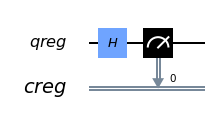

In [6]:
q = QuantumRegister(num_qbits, name='qreg')       #create a Q register of size temp_n
c = ClassicalRegister(num_qbits, name='creg')     #create a Classical Register
QC = QuantumCircuit(q,c)

for i in range (num_qbits):          #H gate on all qubits
    QC.h(q[i])               #h gate to make superposition of 1 and 0
    QC.measure(q[i],c[i])    #collapse the Super position
    
QC.draw('mpl')

Alice will generate a random key called Innitial Key. This will be used to generate the encryption key.

**Alice and Alice only will have this key.** (Innitial Key)

In [7]:
#this is the innitial key that alice generates and will be used to generate the encryption and so on

key = RandomStringG(len_message)                 # store the random string in the variable key
print('Initial key (string): ',key)              #print key

Initial key (string):  100011100011010101101010110101010


Now, Alice will generate a random string of binary numbers again. This will be transmitted to Bob

In [8]:
#Generate a random string of binary digits which she will send to Bob
A_rot = RandomStringG (len_message)
print('Alice rotation key is :',A_rot) #print this random string

Alice rotation key is : 000001001010000001011000000000011


Similarly, Bob will generate a random string. Bob will send this to Alice

In [9]:
#at the same time Bob will generate a random key which he will send to Alice
B_rot = RandomStringG (len_message)
print('Bobs rotation key',B_rot)

Bobs rotation key 101010110101101010111010010001000


Now both Alice and Bob have generated and shared their rotation keys.

Now, Alice uses this **Alice's Rotation Key**. She wants to a send a Superposition of Qubits to Bob. For that first she checks if the bit is 0, then she will prepare a qubit on the negative z axis. If the bit is one, she will prepare a qubit on the positive z axis. This is done by the X gate.

Furthermore, Alice checks that if it is a 1 bit, she will rotate the quibit using a H gate.

Now she sends this superposition to Bob.

He will take this and rotate it in the opposite direction with a H gate. After that Bob measures the qubit and records the result, this is stored in Bob_result.

*If a third party observes this superposition, the key/state will be broken and Bob and Alice will know!*

### Note: Only Alice's Rotation Key and Bob's Rotation Key are public

In [10]:
Bob_result = '' # bob will store his results here


#before sending it rotate it randombly into a superposition

#break the message in length of less than 5 bits for 5 qubit operation. (chunks of 5 bits)
for loc, BM_num  in enumerate(break_message):  #break_message contains how the message/string is divided
    if BM_num <num_qbits:
        temp_key = key[num_qbits*loc:num_qbits*loc+BM_num]
        A_r_temp = A_rot[num_qbits*loc:num_qbits*loc+BM_num]
        B_r_temp = B_rot[num_qbits*loc:num_qbits*loc+BM_num]
    else:
        temp_key = key[BM_num*loc:BM_num*(loc+1)]
        A_r_temp = A_rot[BM_num*loc:BM_num*(loc+1)]
        B_r_temp = B_rot[BM_num*loc:BM_num*(loc+1)]
        
    
    #quantum computer takes over from here
    #generate a register (classical and quantum) and a quantum circuit
    q = QuantumRegister(BM_num)
    c = ClassicalRegister(BM_num)
    SEND_QC = QuantumCircuit(q,c)
    
    
    #the first part will be on alice's size and the second at bobs

    #loop to read each bit of all the above variables
    for i,j,k,n in zip(temp_key,A_r_temp,B_r_temp,range(0,len(temp_key))):
        
        #this will run at alices site
        i = int(i) #covert to int from string, can be 0 or 1
        j = int(j)
        if i >0:
            SEND_QC.x(q[n]) # if bit is 0 prepare a qubit on the negative z axis, If 1 prepare a qubit on the positive z axis, X gate
        if j >0:
            SEND_QC.h(q[n]) #1 in alice's rotate string, she rotates the key qubit with a Hadamard gate, practically, alice should send this state to BOB
        
        
        #techinically create a superpostion here and send it to Bob, (Physcally transport the superposition to bob)
        # Bob recives it and rotates it in another direction
        
        k = int(k)
        if k > 0:
            SEND_QC.h(q[n])   #this H gate rotates the bit
            
            
        #to break the superpositon, Bob measures it
        SEND_QC.measure(q[n], c[n])
    
    #execute    
    Bob_result += list(execute([SEND_QC], backend, shots=1).result().get_counts(SEND_QC).keys())[0][::-1] # Bob will observe the qubit. [::-1], as bob has to reverse the rotation
print("Bob's results: ", Bob_result)      # this is bobs observation

Bob's results:  000000111100011101101010110100001


The above mentioned string is Bobs observation of the Superposition. **This belongs to Bob and Bob only**

Now, Alice and Bob has shared their random strings with one and another and Bob has observed the Qubits that were in superposition (sent by Alice.)

Given the public information i.e. Rotation Keys, Alice and Bob will generate a secret quantum encryption/decryption key.
If a bit in Alice's rotation string is the same as the corresponding bit in Bob's they know that Bob's result is the same as what Alice sent.

(In brief, both the keys should be the same) (Alice based on her original key/Initial Key and Bob based on his measured results/Bob_results).

In [11]:
#using the public data i.e. Bobs and Alices rotation keys
#if a bit in the rotated string is the same in both alice and bobs string! voila, keep this and generate the whole key

#check for one - one correspondence in the 
def KeyGen(rot_1,rot_2,results):
    key = ''
    count = 0
    for i,j in zip(rot_1,rot_2):
        if i == j:
            key += results[count]
        count += 1
    return key

In [12]:
A_key = KeyGen(B_rot,A_rot,key)
print("Alice's key:",A_key)

Alice's key: 0011010010100


In [13]:
B_key = KeyGen(B_rot,A_rot,Bob_result)
print("Bob's key:  ",B_key)

Bob's key:   0011010010100


In [14]:
if A_key == B_key:
    print('The key is a match!')
else:
    print('Error, Key not matched')

The key is a match!


As you can see, the keys are a perfect match, if they were not, someone tried to evesdrob on your superpositon.

### Note: In practice this doesn't happen, there is a lot of noise that gets added to this and thereby the keys dont match. Inorder to overcome this we need to mitigate the errors by taking multiple measurements.

Now we have a secure key that no one knows, we can use **THIS** key to encrypt and decrypt messages

In [15]:
#encoding
#alice will encode a message with the above mentioned key

#shorten the key as it is longer and we have added extra digits at the end
short_A_key = A_key[:len(message)]
encoded_mess =''     #define a empty string to store the encrypted message

#encrypt it to produce a encrypted message
for letter_mes,int_key in zip(message,short_A_key):
    encd_char = chr (ord(letter_mes) + (10+ord(int_key))%256)  # basically shifts the ord(k) by 10 units (in ASCII) # can use any other encryption methods.
    encoded_mess += encd_char
print('Encoded message :', encoded_mess)

#send this encoded message to bob

Encoded message : §§©[©­¦


In [16]:
#to decrypt
#Bob will use his key (which should be the same) to break the encryption
short_B_key = B_key[:len(message)]
decoded_mess =''
for letter_mes,int_key in zip(encoded_mess,short_B_key):
    decd_char = chr (ord(letter_mes)-(10+ord(int_key))%256)  # basically shifts the ord(k) by 10 units (in ASCII)
    decoded_mess += decd_char
print('Decoded message: ',decoded_mess)

Decoded message:  Hello World


# Presence of Eve

### Eve is evesdropping !
Inorder to simulate what will happen if another third person tries to listen to this communication.

Consider Eve is trying to listen what Alice sent to Bob. Eve knows Alice's and Bob's Public rotation keys.

Alice has sent a superposition of random qubits to Bob. Now Eve tries to read these qubits and listen to Alice and Bobs conversation. Consider the situation where Alice has sent Bob a superposition of the qubits and Eve tries to measure them.


In [17]:
#Eve tries to evesdrop
#Eve has captured the qubits and then she applies a X gate to flip them and a H gate to rotates it in the opposite direction as Bob would do.
#but now the Superposition is broken as Eve has measured the quibit.

#now Eve generates Eve_results similar to Bob results.

Eve_result = ''


#break the message in length of less than 5 bits for 5 qubit operation. (chunks of 5 bits)
for loc, BM_num in enumerate(break_message): #break_message contains how the message/string is divided
    if BM_num <num_qbits:
        temp_key = key[num_qbits*loc:num_qbits*loc+BM_num]
        A_r_temp = A_rot[num_qbits*loc:num_qbits*loc+BM_num]   #eve uses Public rotation key of Alice to try to decode the string
    else:
        temp_key = key[BM_num*loc:BM_num*(loc+1)]
        A_r_temp = A_rot[BM_num*loc:BM_num*(loc+1)]
    
    #quantum computer takes over from here
    #generate a register (classical and quantum) and a quantum circuit
    q = QuantumRegister(BM_num)
    c = ClassicalRegister(BM_num)
    Eve_QC = QuantumCircuit(q,c)
    
    #prepare qubits based on key; add Hadamard gates based on Alice's and Bob's
    #rotation strings
    for i,j,n in zip(temp_key,A_r_temp,range(0,len(temp_key))):
        i = int(i)
        j = int(j)
        if i > 0:
            Eve_QC.x(q[n])
        if j > 0:
            Eve_QC.h(q[n])
        Eve_QC.measure(q[n],c[n])
    
    #execute
    Eve_result+=(list(execute(Eve_QC, backend, shots=1).result().get_counts(Eve_QC).keys())[0][::-1])

print("Eve's results: ", Eve_result)

Eve's results:  100010100011010101100010110101011


Since Eve read/observed the superposition the wave function collapsed. Now if Bob doesn't recieve any communication, he would know someone was tring to evesdrop.

Now, Eve tries to be sneaky and tries to generate an superposition of qubits and sends it to Bob so that he doesnt become suspecious. (but that is what Eve thinks)

In [18]:
#this will generate the superposition generated by Eve which she sends to Bob

Bob_bad_result = ''  #stores the result genrated by Eve from the measured qubits!

#the code is similar to the above one
for loc, BM_num in enumerate(break_message):
    if BM_num < num_qbits:
        temp_key = key[num_qbits*loc:num_qbits*loc+BM_num]
        temp_eve = Eve_result[num_qbits*loc:num_qbits*loc+BM_num]
        B_r_temp = B_rot[num_qbits*loc:num_qbits*loc+BM_num]
    else:
        temp_key = key[BM_num*loc:BM_num*(loc+1)]
        temp_eve = Eve_result[BM_num*loc:BM_num*(loc+1)]
        B_r_temp = B_rot[BM_num*loc:BM_num*(loc+1)]
    
    #create a quantum circuit to generate superposition as per Eve_results
    q = QuantumRegister(BM_num)
    c = ClassicalRegister(BM_num)
    Eve_2_QC = QuantumCircuit(q , c)
    
    #prepare qubits and send the superpositon
    for i,j,n in zip(temp_eve,B_r_temp,range(0,len(temp_key))):
        i = int(i)
        j = int(j)
        if i > 0:
            Eve_2_QC.x(q[n])
        if j > 0:
            Eve_2_QC.h(q[n])
            
        #technically Eve will send the superposition of qubits from here to Bob
        Eve_2_QC.measure(q[n],c[n])
    
    #At Bob's site this is what he will observe!
    Bob_bad_result += list(execute(Eve_2_QC, backend, shots=1).result().get_counts(Eve_2_QC).keys())[0][::-1]
    
print("Bob's previous results (w/o Eve):",Bob_result) #original result
print("Bob's results from Eve:\t\t ",Bob_bad_result) #bad/intercepted result

Bob's previous results (w/o Eve): 000000111100011101101010110100001
Bob's results from Eve:		  101000000011110101110010110101011


Bob should have obsvered the first result (w/o Eve), however since Eve tried to evesdrop and generate a new random superposition, Bob will recieve a new quperposition of qubits.

The next cell will show that if Bob tries to generate a key, it will be different than what Alice will genrate. Thereby, Bob wont be able to decrypt the message that Alice has sent!

In [19]:
#make keys for Alice and Bob with the bad result Eve sent
A_key_new = KeyGen(B_rot,A_rot,key)
B_key_new = KeyGen(B_rot,A_rot,Bob_bad_result)

print("Alice's key:   ",A_key_new)
print("Bob's new key: ",B_key_new)

if not A_key_new == B_key_new:
    print("Keys don't match !") #this is just for our reference

Alice's key:    0011010010100
Bob's new key:  0011100010100
Keys don't match !


Since the keys dont match, the encrypted text that Alice will send, Bob wont be able to decrypt it. But how will both Alice and Bob check this ?

Inorder to check the descrepancy, Alice will generate a Check key, i.e. a random key same as the length of the A_new_key. She will then send this random key to Bob who will check his B_new_key for discrepancies 

In [20]:
#generate a random key by Alice and send it to Bob
check_key = RandomStringG(len(A_key_new))
print('spots to check:',check_key)

spots to check: 0100011011001


In [21]:
#with the help of publicly known keys, i.e. Alice rotation key and Bob rotation key and now check Key
#after recieving this key, both Alice and Bob will check for the position of the binary digit '1' in the check key and generate a Sub_key


#this is ALice site
#find the values in the roation keys that were used to make the KEY, here initial key
A_key_rot = KeyGen(B_rot,A_rot,A_rot)

# Inorder to detect Eve's interference extract a subset of Alice's key 
sub_A_key = ''
count = 0
for i,j in zip(A_rot,A_key_new):
    if int(check_key[count]) == 1:
        sub_A_key += A_key_new[count]
    count += 1
#print the faulty subsection of public keys and send it to Bob
print("subset of Alice's key:",sub_A_key)
    
    
       
#this is Bob site
#find the values in the roation keys that were used to make the KEY, here Bob_result
B_key_rot = KeyGen(B_rot,A_rot,B_rot)

#extract a subset of Bob's key
sub_B_key = ''
count = 0
for i,j in zip(B_rot,B_key_new):
    if int(check_key[count]) == 1:
        sub_B_key += B_key_new[count]

    count += 1
    
#print the faulty subsection of public keys and send it to Alice
print("subset of Bob's key:  ",sub_B_key)

#now Alice and Bob sends their faulty keys (which are a part of the public knowledge,as they were shared) to one and another 
#compare Alice and Bob's key subsets

secure = True
for i,j in zip(sub_A_key,sub_B_key):
    if i == j:
        secure = True
    else:
        secure = False
        break;
if not secure:
    print('Eve detected!')
else:
    print('No evesdropper detected')
    

subset of Alice's key: 010100
subset of Bob's key:   000100
Eve detected!


### Note: It is important to have longer keys so that it becomes easier to detect the presence of Eve